In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline


In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:

train['TotalBath']=train['FullBath']+0.5*train['HalfBath']
test['TotalBath']=test['FullBath']+0.5*train['HalfBath']
train['TotalSF']=train['1stFlrSF']+train['2ndFlrSF']+train['TotalBsmtSF']
test['TotalSF']=test['1stFlrSF']+test['2ndFlrSF']+test['TotalBsmtSF']

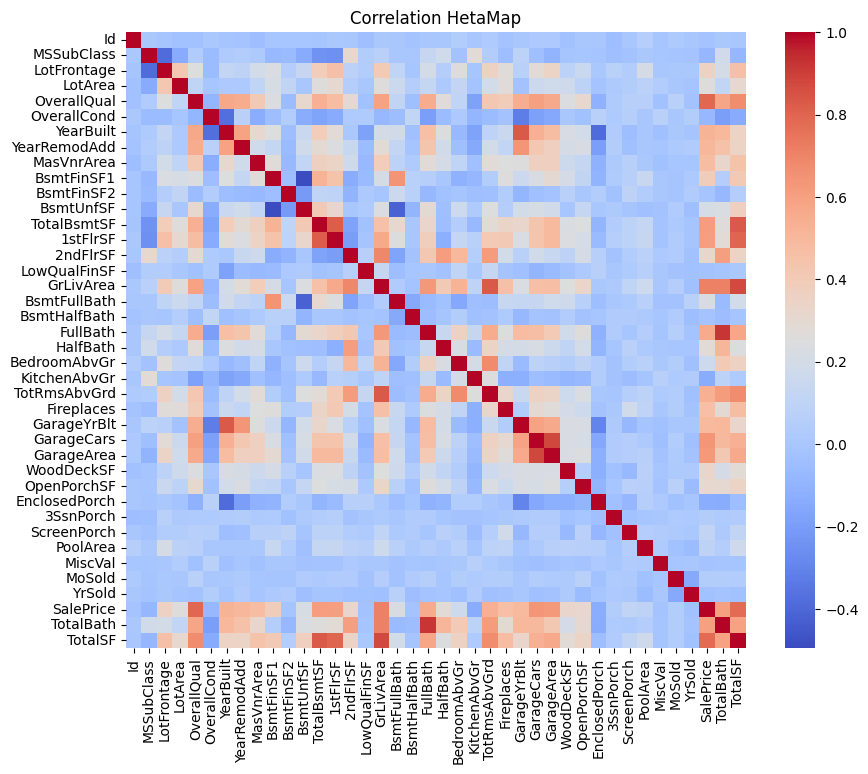

In [5]:
corr_matrix=train.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap='coolwarm')
plt.title("Correlation HetaMap")
plt.show()

In [6]:
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
TotalSF          0.782260
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
TotalBath        0.597966
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorc

In [7]:
missing=train.isnull().sum()
missing[missing>0]
missing.sort_values(inplace=True, ascending=False)
missing.head(10)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageType        81
GarageFinish      81
dtype: int64

In [8]:
cols_to_drop=['PoolQC', 'MiscFeature','Alley', 'Fence','MasVnrType', 'FireplaceQu', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'FullBath', 'LotArea', 'BsmtFullBath','BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch', 'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath', 'MiscVal', 'Id', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr', '1stFlrSF', 'GarageArea', 'GarageYrBlt']

In [9]:
train.drop(cols_to_drop, axis=1, inplace=True)
test.drop(cols_to_drop, axis=1, inplace=True)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   LotFrontage    1201 non-null   float64
 2   Street         1460 non-null   object 
 3   LotShape       1460 non-null   object 
 4   LandContour    1460 non-null   object 
 5   Utilities      1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   LandSlope      1460 non-null   object 
 8   Neighborhood   1460 non-null   object 
 9   Condition1     1460 non-null   object 
 10  Condition2     1460 non-null   object 
 11  BldgType       1460 non-null   object 
 12  HouseStyle     1460 non-null   object 
 13  OverallQual    1460 non-null   int64  
 14  YearBuilt      1460 non-null   int64  
 15  YearRemodAdd   1460 non-null   int64  
 16  RoofStyle      1460 non-null   object 
 17  RoofMatl       1460 non-null   object 
 18  Exterior

In [11]:
train['YearBuilt']=pd.to_datetime(train['YearBuilt'], format='%Y')
train['YearRemodAdd']=pd.to_datetime(train['YearRemodAdd'], format='%Y')


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1455 non-null   object 
 1   LotFrontage    1232 non-null   float64
 2   Street         1459 non-null   object 
 3   LotShape       1459 non-null   object 
 4   LandContour    1459 non-null   object 
 5   Utilities      1457 non-null   object 
 6   LotConfig      1459 non-null   object 
 7   LandSlope      1459 non-null   object 
 8   Neighborhood   1459 non-null   object 
 9   Condition1     1459 non-null   object 
 10  Condition2     1459 non-null   object 
 11  BldgType       1459 non-null   object 
 12  HouseStyle     1459 non-null   object 
 13  OverallQual    1459 non-null   int64  
 14  YearBuilt      1459 non-null   int64  
 15  YearRemodAdd   1459 non-null   int64  
 16  RoofStyle      1459 non-null   object 
 17  RoofMatl       1459 non-null   object 
 18  Exterior

In [13]:
test['Utilities']=test['Utilities'].fillna(test['Utilities'].mode()[0])
test['Exterior1st']=test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test['Exterior2nd']=test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])
test['BsmtFinSF1']=test['BsmtFinSF1'].fillna(0)
test['TotalBsmtSF']=test['TotalBsmtSF'].fillna(0)
test['KitchenQual']=test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test['Functional']=test['Functional'].fillna(test['Functional'].mode()[0])
test['GarageCars']=test['GarageCars'].fillna(0)
test['SaleType']=test['SaleType'].fillna(test['SaleType'].mode()[0])
test['YearBuilt']=pd.to_datetime(test['YearBuilt'], format='%Y')
test['YearRemodAdd']=pd.to_datetime(test['YearRemodAdd'], format='%Y')

In [14]:
categ_cols=train.select_dtypes(include=[object, 'datetime']).columns.tolist()
num_cols=train.select_dtypes(include='number').columns.tolist()
num_cols.remove('SalePrice')

In [15]:
categ_pipeline=Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='None')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
num_pipeline=Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler())
])
processor=ColumnTransformer([
    ('categ', categ_pipeline, categ_cols),
    ('num', num_pipeline, num_cols)
])

In [16]:
y=train['SalePrice']
X=train.drop('SalePrice', axis=1)

In [17]:
lr_model=Pipeline([
    ('processing', processor),
    ('model', LinearRegression())
])
lr_scores=cross_val_score(lr_model, X, y, cv=5, scoring='neg_mean_squared_error')

In [18]:
rg_model=Pipeline([
    ('processing', processor),
    ('model', Ridge())
])
rg_scores=cross_val_score(rg_model, X, y, cv=5, scoring='neg_mean_squared_error')

In [19]:
lasso_model=Pipeline([
    ('processing', processor),
    ('model', Lasso())
])
lasso_scores=cross_val_score(lasso_model, X, y, cv=5, scoring='neg_mean_squared_error')

c:\Users\SUYOG\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 245935919649.2038, tolerance: 759214014.2531197
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\SUYOG\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 179928660722.0139, tolerance: 728773513.025937
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\SUYOG\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173216760126.071, tolerance: 699031751.5199751
  model = cd_fast.sparse_enet_coordinate_descent(


In [20]:
rf_model=Pipeline([
    ('processing', processor),
    ('model', RandomForestRegressor())
])
rf_scores=cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

In [21]:
en_model=Pipeline([
    ('processing', processor),
    ('model', ElasticNet())
])
en_scores=cross_val_score(en_model, X, y, cv=5, scoring='neg_mean_squared_error')

In [22]:
gbr_model=Pipeline([
    ('processing', processor),
    ('model', GradientBoostingRegressor())
])
gbr_scores=cross_val_score(gbr_model, X, y, cv=5, scoring='neg_mean_squared_error')

In [23]:
svr_model=Pipeline([
    ('processing', processor),
    ('model', SVR())
])
svr_scores=cross_val_score(svr_model, X, y, cv=5, scoring='neg_mean_squared_error')

In [24]:
cb_model=Pipeline([
    ('processing', processor),
    ('model', CatBoostRegressor())
])
cb_scores=cross_val_score(cb_model, X, y, cv=5, scoring='neg_mean_squared_error')

Learning rate set to 0.04196
0:	learn: 78521.1885652	total: 156ms	remaining: 2m 35s
1:	learn: 76420.0803192	total: 161ms	remaining: 1m 20s
2:	learn: 74385.6466517	total: 168ms	remaining: 55.8s
3:	learn: 72525.0924033	total: 171ms	remaining: 42.6s
4:	learn: 70882.7780813	total: 175ms	remaining: 34.8s
5:	learn: 69043.8423898	total: 178ms	remaining: 29.4s
6:	learn: 67237.7876462	total: 183ms	remaining: 25.9s
7:	learn: 65433.4688483	total: 187ms	remaining: 23.2s
8:	learn: 64043.4488274	total: 191ms	remaining: 21.1s
9:	learn: 62524.3004910	total: 195ms	remaining: 19.3s
10:	learn: 61148.0011885	total: 196ms	remaining: 17.7s
11:	learn: 59755.4937431	total: 200ms	remaining: 16.5s
12:	learn: 58377.6803076	total: 203ms	remaining: 15.4s
13:	learn: 57011.4050306	total: 205ms	remaining: 14.5s
14:	learn: 55690.0899001	total: 208ms	remaining: 13.7s
15:	learn: 54645.6653262	total: 210ms	remaining: 12.9s
16:	learn: 53517.2940754	total: 213ms	remaining: 12.3s
17:	learn: 52379.1778083	total: 215ms	remain

In [25]:
xgbr_model=Pipeline([
    ('processing', processor),
    ('model', XGBRegressor())
])
xgbr_scores=cross_val_score(xgbr_model, X, y, cv=5, scoring='neg_mean_squared_error')

In [26]:
print('MSE score for lr_model:', -lr_scores.mean())
print('MSE score for rg_model:', -rg_scores.mean())
print('MSE score for lasso_model:', -lasso_scores.mean())
print('MSE score for rf_model:', -rf_scores.mean())
print('MSE score for en_model:', -en_scores.mean())
print('MSE score for gbr_model:', -gbr_scores.mean())
print('MSE score for xgbr_model:', -xgbr_scores.mean())
print('MSE score for cb_model:', -cb_scores.mean())
print('MSE score for svr_model:', -svr_scores.mean())

MSE score for lr_model: 1430905905.290903
MSE score for rg_model: 1205805608.8495164
MSE score for lasso_model: 1389054544.9766514
MSE score for rf_model: 952766339.3807304
MSE score for en_model: 1273607163.6630912
MSE score for gbr_model: 797768200.2236278
MSE score for xgbr_model: 855541337.6
MSE score for cb_model: 765632505.0506632
MSE score for svr_model: 6616842486.1428585


In [27]:
cb_model.fit(X, y)

Learning rate set to 0.043466
0:	learn: 77164.2086808	total: 2.27ms	remaining: 2.27s
1:	learn: 75128.6673488	total: 3.74ms	remaining: 1.87s
2:	learn: 73004.6112829	total: 5.77ms	remaining: 1.92s
3:	learn: 70906.5540852	total: 7.78ms	remaining: 1.94s
4:	learn: 68970.6917295	total: 9.66ms	remaining: 1.92s
5:	learn: 67175.7558715	total: 11.5ms	remaining: 1.91s
6:	learn: 65302.1512377	total: 13.5ms	remaining: 1.92s
7:	learn: 63512.8799846	total: 15.4ms	remaining: 1.91s
8:	learn: 61917.3276934	total: 17.4ms	remaining: 1.92s
9:	learn: 60510.4163273	total: 19.3ms	remaining: 1.91s
10:	learn: 58962.6160444	total: 21.1ms	remaining: 1.9s
11:	learn: 57439.7120954	total: 23ms	remaining: 1.9s
12:	learn: 56104.3226179	total: 24.9ms	remaining: 1.89s
13:	learn: 54931.2284457	total: 26.7ms	remaining: 1.88s
14:	learn: 53582.6758582	total: 28.6ms	remaining: 1.88s
15:	learn: 52411.8072455	total: 30.4ms	remaining: 1.87s
16:	learn: 51254.3674297	total: 32.2ms	remaining: 1.86s
17:	learn: 50260.7477875	total: 

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('categ',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='None',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['MSZoning', 'Street',
                                                   'LotShape', 'LandContour',
                                                   'Utilities', 'LotConfig',
                                                   'LandSlope', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle'...
                                                   'Electrical', ...]),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['LotFrontage', 'OverallQual',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'TotalBsmtSF', 'GrLivArea',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageCars', 'TotalBath',
                                                   'TotalSF'])])),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x00000206ADD3FCB0>)])

In [34]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import SGDRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
base_models=[
    ('GBR', gbr_model),
    ('XGBR', xgbr_model),
    ('CB', cb_model)
]
meta_model=[LinearRegression(), Ridge(), Lasso(), ElasticNet(), SGDRegressor(), SVR(), RandomForestRegressor(), GradientBoostingRegressor(), CatBoostRegressor(), XGBRegressor(), ]

for meta in meta_model:
    sr_model=StackingRegressor(base_models, meta, n_jobs=-1, cv=5, passthrough=False)
    sr_model.fit(X_train, y_train)
    sr_scores=cross_val_score(sr_model, X, y, cv=5, scoring='neg_mean_squared_error')
    print(f'MSE score of {meta} model is:', -sr_scores.mean())


MSE score of LinearRegression() model is: 758775938.791322
MSE score of Ridge() model is: 755884554.295917
MSE score of Lasso() model is: 756540546.9898659
MSE score of ElasticNet() model is: 756989894.5441978
MSE score of SGDRegressor() model is: 8.010964298913872e+38
MSE score of SVR() model is: 6600670933.180016
MSE score of RandomForestRegressor() model is: 918104652.2731441
MSE score of GradientBoostingRegressor() model is: 1054849327.7814461
Learning rate set to 0.04196
0:	learn: 74670.6025997	total: 977us	remaining: 976ms
1:	learn: 72255.6648872	total: 2.03ms	remaining: 1.01s
2:	learn: 69941.5800090	total: 3.39ms	remaining: 1.13s
3:	learn: 67697.3200730	total: 4.8ms	remaining: 1.2s
4:	learn: 65632.6186934	total: 6.21ms	remaining: 1.24s
5:	learn: 63630.2684956	total: 7.42ms	remaining: 1.23s
6:	learn: 61712.7054733	total: 8.62ms	remaining: 1.22s
7:	learn: 59895.8624473	total: 9.85ms	remaining: 1.22s
8:	learn: 58200.0735596	total: 11.1ms	remaining: 1.23s
9:	learn: 56502.7865993	tot

In [32]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
base_models=[
    ('GBR', gbr_model),
    ('XGBR', xgbr_model),
    ('CB', cb_model)
]
rg_meta=Ridge()
rg_sr=StackingRegressor(base_models, rg_meta, n_jobs=-1, cv=5, passthrough=False)
rg_param={
    'final_estimator__alpha':[0.001, 0.01, 0.1, 1, 10]
}
rg_sr_grid=GridSearchCV(rg_sr, rg_param, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
rg_sr_grid.fit(X_train, y_train)
rg_sr_model=rg_sr_grid.best_estimator_
rg_sr_scores=cross_val_score(rg_sr_model, X, y, cv=5, scoring='neg_mean_squared_error')


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
base_models=[
    ('GBR', gbr_model),
    ('XGBR', xgbr_model),
    ('CB', cb_model)
]
lasso_meta=Lasso()
lasso_sr=StackingRegressor(base_models, lasso_meta, n_jobs=-1, cv=5, passthrough=False)
lasso_param={
    'final_estimator__alpha':[0.001, 0.01, 0.1, 1, 10]
}
lasso_sr_grid=GridSearchCV(lasso_sr, lasso_param, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
lasso_sr_grid.fit(X_train, y_train)
lasso_sr_model=lasso_sr_grid.best_estimator_
lasso_sr_scores=cross_val_score(lasso_sr_model, X, y, cv=5, scoring='neg_mean_squared_error')

c:\Users\SUYOG\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.925e+11, tolerance: 7.249e+08
  model = cd_fast.enet_coordinate_descent(


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
base_models=[
    ('GBR', gbr_model),
    ('XGBR', xgbr_model),
    ('CB', cb_model)
]
en_meta=ElasticNet()
en_sr=StackingRegressor(base_models, en_meta, n_jobs=-1, cv=5, passthrough=False)
en_param={
    'final_estimator__alpha':[0.001, 0.01, 0.1, 1, 10],
    'final_estimator__l1_ratio':[0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
}
en_sr_grid=GridSearchCV(en_sr, en_param, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
en_sr_grid.fit(X_train, y_train)
en_sr_model=en_sr_grid.best_estimator_
en_sr_scores=cross_val_score(en_sr_model, X, y, cv=5, scoring='neg_mean_squared_error')

c:\Users\SUYOG\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.291e+11, tolerance: 7.249e+08
  model = cd_fast.enet_coordinate_descent(


In [35]:
print('MSE score of rg_sr_model:', -rg_sr_scores.mean())
print('MSE score of lasso_sr_model:', -lasso_sr_scores.mean())
print('MSE score of en_sr_model:', -en_sr_scores.mean())

MSE score of rg_sr_model: 755097467.2082479
MSE score of lasso_sr_model: 756470563.7677394
MSE score of en_sr_model: 755943647.444463


In [37]:
rg_sr_model.fit(X, y)

StackingRegressor(cv=5,
                  estimators=[('GBR',
                               Pipeline(steps=[('processing',
                                                ColumnTransformer(transformers=[('categ',
                                                                                 Pipeline(steps=[('imputer',
                                                                                                  SimpleImputer(fill_value='None',
                                                                                                                strategy='constant')),
                                                                                                 ('onehot',
                                                                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                                                                 ['MSZoning',
                                                                                  'Street',
                                                                                  'LotShape',
                                                                                  'LandContour',
                                                                                  'Utilities',
                                                                                  'LotConfig',
                                                                                  'LandSlope',
                                                                                  'Neighborhood',
                                                                                  'Condit...
                                                                                 Pipeline(steps=[('imputer',
                                                                                                  SimpleImputer(fill_value=0,
                                                                                                                strategy='constant')),
                                                                                                 ('scaler',
                                                                                                  StandardScaler())]),
                                                                                 ['LotFrontage',
                                                                                  'OverallQual',
                                                                                  'MasVnrArea',
                                                                                  'BsmtFinSF1',
                                                                                  'TotalBsmtSF',
                                                                                  'GrLivArea',
                                                                                  'TotRmsAbvGrd',
                                                                                  'Fireplaces',
                                                                                  'GarageCars',
                                                                                  'TotalBath',
                                                                                  'TotalSF'])])),
                                               ('model',
                                                <catboost.core.CatBoostRegressor object at 0x00000206C211EC30>)]))],
                  final_estimator=Ridge(alpha=10), n_jobs=-1)

In [42]:
y_pred=rg_sr_model.predict(test)
y_pred=np.round(y_pred, 1)
predictions=pd.DataFrame({'Id':range(1461, 1461+len(y_pred)) , 'SalePrice':y_pred})
predictions
predictions.to_csv('Submission-9.csv', index=False)